Grade: 90/100
1.) Missing clear lab writeup layout i.e. Abstract, theory, summary, conclusion 
2.) Chi-squared not calculated quite right

## Astro 361 Statistics Lab
## Marah Brinjikji
## 9/15/16
## 9/22/16

# Introduction
In this lab, we were required to prove some statistical equations that we learned about in lecture. These equations are the binomial distribution and the Poisson Distribution functions.

### Binomial Distribution = $P(N,n) = {N! \over n!(N-n!)}  p^n (1-p)^{(N-n)}$

### Poisson Distribution = $P(N,n) = {\lambda^n e^{-\lambda}\over n!}$

The Binomial Distribution is a frequency distribution of the possible number of successful outcomes in a given number of trials in each of which there is the same probability of success. 
The Poisson Distribution is used when there is a small probability of success with a large number of trials. Plugging  a small number in for p into the Binomial Distribution and taking the limit as N goes to infinity gives us the formula for the Poisson distribution.

Now, I am going to run the Bernoulli trial using a computer. This means I'm going to let a computer flip a bunch of coins and figure out the probability distribution when a lot of trials are run. Throughout this whole notebook, I will use a trial number of 10000.

# Problem 1

In [86]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)
import scipy.misc as scm
from scipy.stats import chisquare

How many trials? 10000
How many coins? 20
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+01
   5.20000000e+01   1.52000000e+02   3.86000000e+02   7.22000000e+02
   1.23000000e+03   1.53800000e+03   1.75200000e+03   1.58800000e+03
   1.22500000e+03   7.67000000e+02   3.65000000e+02   1.43000000e+02
   4.80000000e+01   1.90000000e+01   2.00000000e+00   1.00000000e+00
   0.00000000e+00]


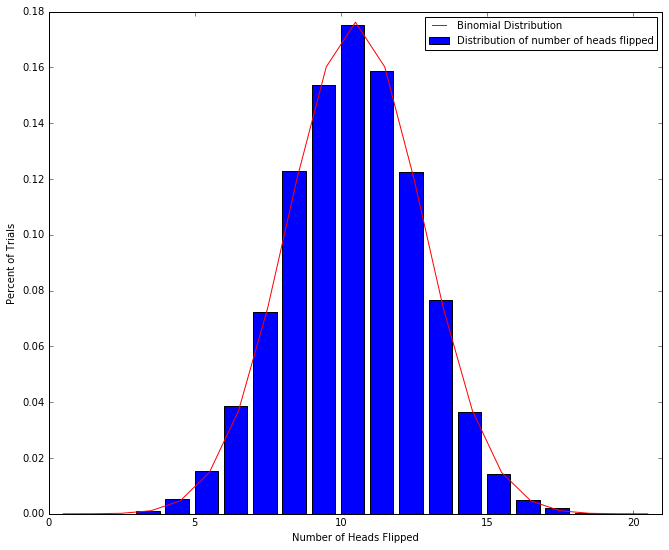

In [101]:
'''Here, I let the user input how many trials and coins they want to run the Bernoulli trial with'''
trials = int(raw_input("How many trials? ")) 
coins = int(raw_input("How many coins? "))
'''Here, I tell the computer what constitutes a "heads" flip and what constitutes a "tails" flip. 1 is heads, 
0 is tails'''
counts = np.zeros(coins+1)
for i in range(0,trials):
    draw = np.random.randint(2, size=coins)
    heads_count = len(draw[(np.where(draw == 1))])
    tails_count = len(draw[(np.where(draw == 0))])
    counts[heads_count] = counts[heads_count] +1
print counts
'''Here, I define the binomial distribution for whatever trial and coin number was given. This is the code form of
the formula written in the introduction'''
def PNx(N):
    p = 0.5
    x = np.arange(N+1.)
    PNx = scm.factorial(N)/((scm.factorial(x)*scm.factorial(N-x)))*((p)**N)
    return PNx
'''Here I plot the distribution of heads and the binomial distribution'''
plt.bar(np.arange(coins+1), counts/trials, label = 'Distribution of number of heads flipped')
plt.plot(np.arange(coins+1)+0.5,PNx(coins), label = 'Binomial Distribution', color = 'red')
plt.legend(fontsize=10)
plt.xlim(0,21)
plt.xlabel('Number of Heads Flipped')
plt.ylabel('Percent of Trials')
plt.show()

The peak of this distribution is around 10.
I numerically calculated these values using the code above.

In [102]:
'''I redefine the user inputs for trial and coin numbers, and how heads and tails are defined'''
trials = int(raw_input("How many trials? "))
coins = int(raw_input("How many coins? "))
counts = np.zeros(coins+1)
for i in range(0,trials):
    draw = np.random.randint(2, size=coins)
    heads_count = len(draw[(np.where(draw == 1))])
    tails_count = len(draw[(np.where(draw == 0))])
    counts[heads_count] = counts[heads_count] +1
'''Here I defined the equation for expectation value'''
P_x = counts/trials ## Probability function
x_vec = np.arange(coins + 1) ## our x
Sum = sum(P_x * x_vec)
print ('E(x): ' + str(Sum))

How many trials? 10000
How many coins? 40
E(x): 19.9902


E(20) = 10.0327

E(40) = 19.9902

This makes sense--doubling the number of coins will double where the peak of the distribution lies. The analytical mean is also around half of the total number of coins. $\mu = Np$, where $\mu$ is the mean, N is the number of coins, and p is the probability. With two results as to how the coin will land, $p=0.5$, so the mean is $1/2N$.

## Problem 2

Input your user-defined probability of success: .01
How many trials? 10000
How many coins? 100


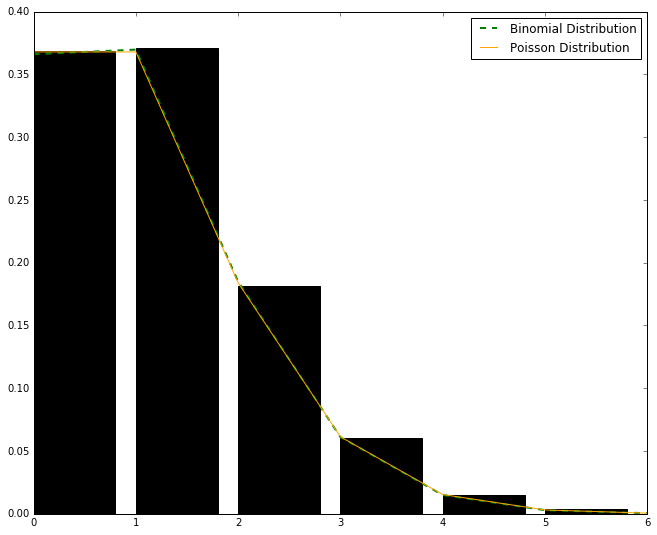

In [79]:
'''Now, instead of using a set probability of p=0.5, I let the user define it themself. I also redefine the 
trial and coin number to keep it separate from the previous question.'''
probability = float(raw_input("Input your user-defined probability of success: "))
trials = int(raw_input("How many trials? "))
coins = int(raw_input("How many coins? "))
'''Since there is no longer a 50-50 probability, I have to redefine the counts so that it's "unfair". Now 
it depends on how the user defines it.'''
counts = np.zeros(coins+1)
for i in range(0,trials):
    draw = np.random.uniform(0,1,size=coins)
    heads_count = len(draw[(np.where(draw < probability))])
    tails_count = len(draw[(np.where(draw > probability))])
    counts[heads_count] = counts[heads_count] +1
'''Here I plot the distribution of trials'''
plt.bar(np.arange(coins+1), counts/trials, color = 'black')
plt.xlim(0,6)
plt.ylim(0,.4)
'''Now, I define the poisson function, and redefine the binomial distribution so it's weighted unfairly.'''
def Poisson(N):
    x = np.arange(N+1.)
    lam = N*probability
    Poisson = (lam**x * np.exp(-lam)) / (scm.factorial(x))
    return Poisson
def PNx(N):
    x = np.arange(N+1.)
    PNx = scm.factorial(N)/((scm.factorial(x)*scm.factorial(N-x)))*((probability)**x)*(1-probability)**(N-x)
    return PNx
plt.plot(np.arange(coins+1),PNx(coins),  label = 'Binomial Distribution', color = 'green', ls = '--',linewidth = 2)
plt.plot(np.arange(coins+1),Poisson(coins), label = 'Poisson Distribution', color = 'orange')
plt.legend(fontsize=12)
plt.show()

In [94]:
probability = float(raw_input("Input your user-defined probability of success: "))
trials = int(raw_input("How many trials? "))
coins = int(raw_input("How many coins? "))
counts = np.zeros(coins+1)
for i in range(0,trials):
    draw = np.random.uniform(0,1,size=coins)
    heads_count = len(draw[(np.where(draw < probability))])
    tails_count = len(draw[(np.where(draw > probability))])
    counts[heads_count] = counts[heads_count] +1
P_x = counts/trials
x_vec = np.arange(coins + 1)
Sum = (np.sum(P_x * x_vec))
Var = np.sum((P_x * x_vec**2)) - Sum**2
print Var
print Sum
c = chisquare(counts/trials,(Poisson(coins)))
chi_squared = np.sum((counts/trials - Poisson(coins))**2)
print c
print chi_squared

Input your user-defined probability of success: .01
How many trials? 10000
How many coins? 100
1.01809471
1.0023
Power_divergenceResult(statistic=0.00041469789143933598, pvalue=1.0)
3.85273327271e-05


The mean of $X^2$ is 1.0023. I determined this value by summing the expectation value. The variance of $X^2$ is 1.0181, and I determined this by using the equation $\sum{x^2P(x)} - {(\sum{xP(x)})^2}$. These values are very close to each other, which is expected.

My $\Xi^2$ fit is $3.8527 x 10^{-5}$. This is a very close fit as the number is extremely close to 0, meaning our data fits the expectation. 

This lab taught me a lot about statistics, and I'm not just saying that. Four hours ago I didn't think I knew anything about statistics but writing this lab report made me realize how much I actually do know! So I think this lab was a grade-A success. So please give me an A. Thanks.